# Trip Duration Variation in Ford GoBike System Covering San Francisco Bay area

# Investigative Overview
In this investigation, I looked at the trip varaition among some categorical variables in our dataset, these variables includes, the User type, whether the user is just a customer or a subscriber, the gender, there are 3 gender categories specified which are male, female and other, the weekdays and whether the user subscribed for the bike_share_for_all_trip.

# Dataset Overview

This Project explores the Ford GoBike System Data, a dataset that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [6]:
# drop the longitude and latitude columns
df.drop(columns = ['start_station_longitude', 'start_station_latitude',
                   'end_station_longitude','end_station_latitude'], inplace = True)

In [7]:
# drop the missing values
df.dropna(inplace = True)

In [8]:
# convert the start_time and end_time to a datetime object
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [9]:
# lets write a function that takes a column of the dataset and change it to a specified datatype
def datatype_converter(data,column, datatype):
    """ this changes the datatype of the column to the specified datatype"""
    data[column] = data[column].astype(datatype)
    return data[column]

In [10]:
# checking our function on the bike_id column
datatype_converter(df,'bike_id', str)
df.bike_id.dtype

dtype('O')

In [11]:
# fixing the columns datatype
datatype_converter(df,'start_station_id',int)
datatype_converter(df,'end_station_id',int)
datatype_converter(df,'member_birth_year',int)
datatype_converter(df,'start_station_id',str)
datatype_converter(df,'end_station_id',str)
datatype_converter(df,'user_type','category')
datatype_converter(df,'member_gender','category')
datatype_converter(df,'bike_share_for_all_trip','category')

0          No
2          No
3          No
4         Yes
5          No
         ... 
183407     No
183408     No
183409    Yes
183410     No
183411     No
Name: bike_share_for_all_trip, Length: 174952, dtype: category
Categories (2, object): ['No', 'Yes']

let's create some additional columns to aid this analysis

In [12]:
# columns creation
df['start_weekday'] = df['start_time'].dt.strftime('%a')
df['hour'] = df['start_time'].dt.hour.astype(str)
df['member_age'] = 2022 - df['member_birth_year']

In [13]:
# convert start_month, start_weekday and hour to a categorical variable
df['start_weekday'] = pd.Categorical(df['start_weekday'], categories = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],ordered = True)

df['hour'] = pd.Categorical(df['hour'], categories = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'], ordered = True)

In [14]:
# creating the trip duration in seconds
df['duration_mins'] = df['duration_sec']/60

In [15]:
# lets see what our numerical variables looks like
df.select_dtypes('number').describe()

,duration_sec,member_birth_year,member_age,duration_mins
count,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,1984.803135,37.196865,11.733379
std,1642.204905,10.118731,10.118731,27.370082
min,61.000000,1878.000000,21.000000,1.016667
25%,323.000000,1980.000000,30.000000,5.383333
50%,510.000000,1987.000000,35.000000,8.500000
75%,789.000000,1992.000000,42.000000,13.150000
max,84548.000000,2001.000000,144.000000,1409.133333


# Trip Duration in seconds Distribution

The distribution of trip duration in seconds have a mamximum value of 84,548 and minimum of 61 seconds, so plotting the distribution shows an extremely right skewed plot, this also suggests some extreme outliers. plotting the distribution on a logarithmic scale and making the upper bound 10,000 seconds, the plot follows a unimodal normal distributed plot

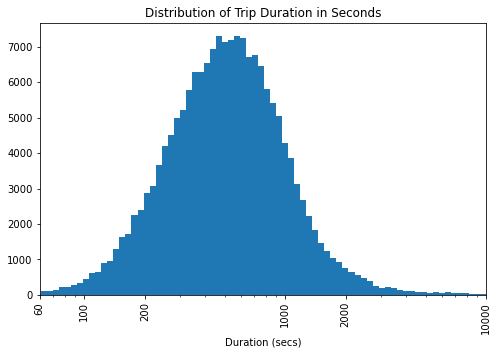

In [133]:
# making 10,000 our upper bound
binsize = 0.03
bins = 10**np.arange(1.785, 5+binsize, binsize)
plt.figure(figsize = [8,5])
plt.hist(df['duration_sec'], bins = bins)
plt.xscale('log')
plt.xlabel('Duration (secs)')
plt.title('Distribution of Trip Duration in Seconds')
plt.xlim([60,10000])
ticks = [60,100, 200, 1000,2000,10000]
labels = ['{}'.format(a) for a in ticks]
plt.xticks(ticks,labels,rotation = 90)
plt.savefig('duration2.png')

# Trip Duration in minutes Distribution
The distribution of this plot is technically the same with that of trip duration in seconds, but this was created to make presentation easier and for better understanding

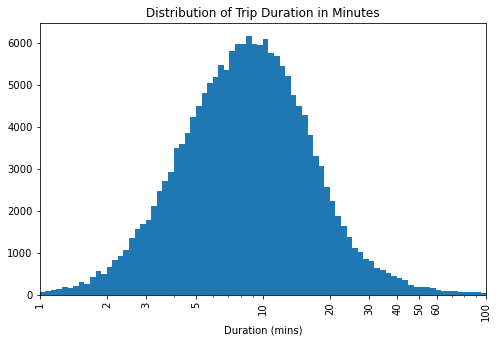

In [135]:
# making 100 mins our upper bound
binsize = 0.025
bins = 10**np.arange(0, 3.5 + binsize, binsize)
plt.figure(figsize = [8,5])
plt.hist(df['duration_mins'], bins = bins)
plt.xscale('log')
plt.xlabel('Duration (mins)')
plt.title('Distribution of Trip Duration in Minutes');
plt.xlim([1,100])
ticks = [1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 100]
labels = ['{}'.format(a) for a in ticks]
plt.xticks(ticks,labels,rotation = 90)
plt.savefig('duration_mins.png');

In [20]:
# let's define our numeric and categorical variables
num_var = ['member_age','duration_mins']
cat_var = ['member_gender','user_type','bike_share_for_all_trip']

# Variation of trip duration in minutes among the categorical variables
This shows that for genders, others and females shows a similar pattern in trip duration in minutes with males having shorter rides. This plot also shows that customers trip duration have a higher variation and als have the longest rides furthermore, those that did not subscribe for the bike share for all trip seems to have longer trip durations than those that subscribed for the program.

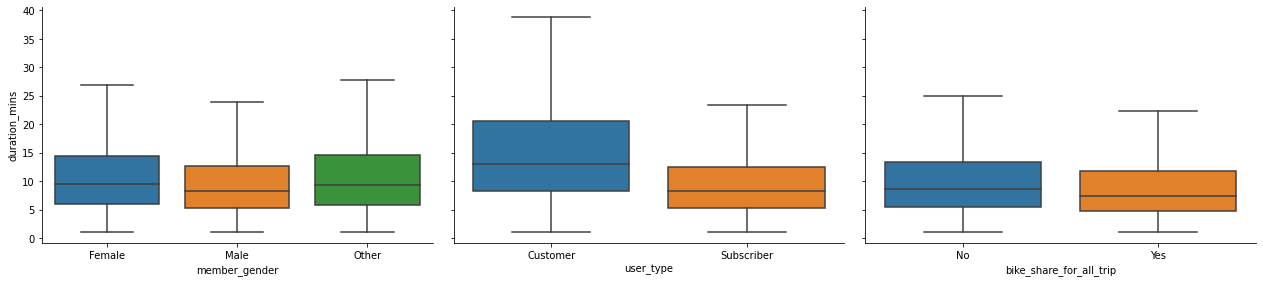

In [21]:
b = sns.PairGrid(data = df, x_vars = cat_var,y_vars = 'duration_mins', height = 4, aspect = 1.5, diag_sharey =False)
b.map(sns.boxplot, sym="");

# Variation of Trip Duration during weekdays and Each Hour

For the days of the week, the weekdays showed a similar distribution of trip duration, except for the weekends which suggests that longer trips are taken during the weekends than the weekdays.

Text(0.5, 1.0, 'Distribution of Trip Duration Every Hour')

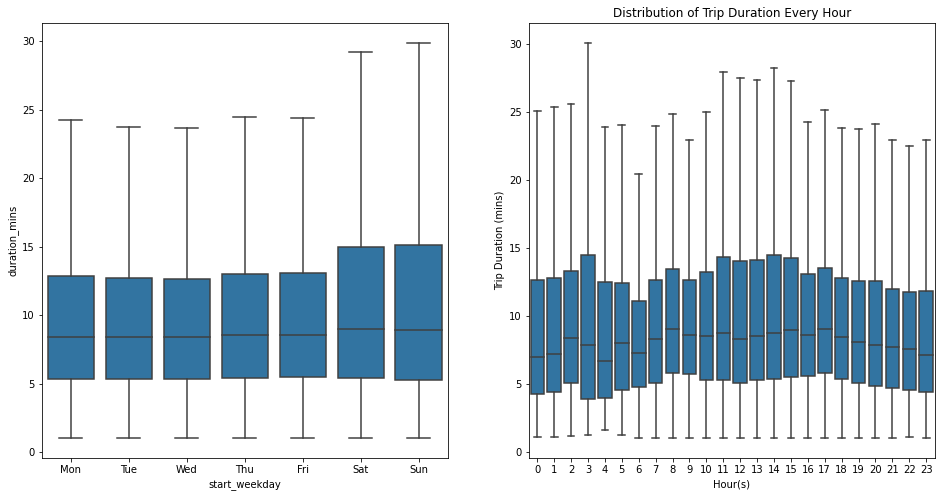

In [404]:
# for weekdays
fig, ax = plt.subplots(ncols = 2, figsize =[16,8])
sns.boxplot(data = df, x = 'start_weekday', y = 'duration_mins', color = base_color, sym ="", ax = ax[0])
plt.xlabel('Weekdays')
plt.ylabel('Trip Duration (mins)')
plt.title('Distribution of Trip Duration Every Weekday')

# for each hour
sns.boxplot(data = df, x = 'hour', y = 'duration_mins', color = base_color, sym = "", ax = ax[1])
plt.xlabel('Hour(s)')
plt.ylabel('Trip Duration (mins)')
plt.title('Distribution of Trip Duration Every Hour')

# Average Duration of trips Every day of the week for each categorical variable
This further support our previous findings that customers make longer trips and those that didn't subscribe for the bike_share_for all_trip makes longer trips

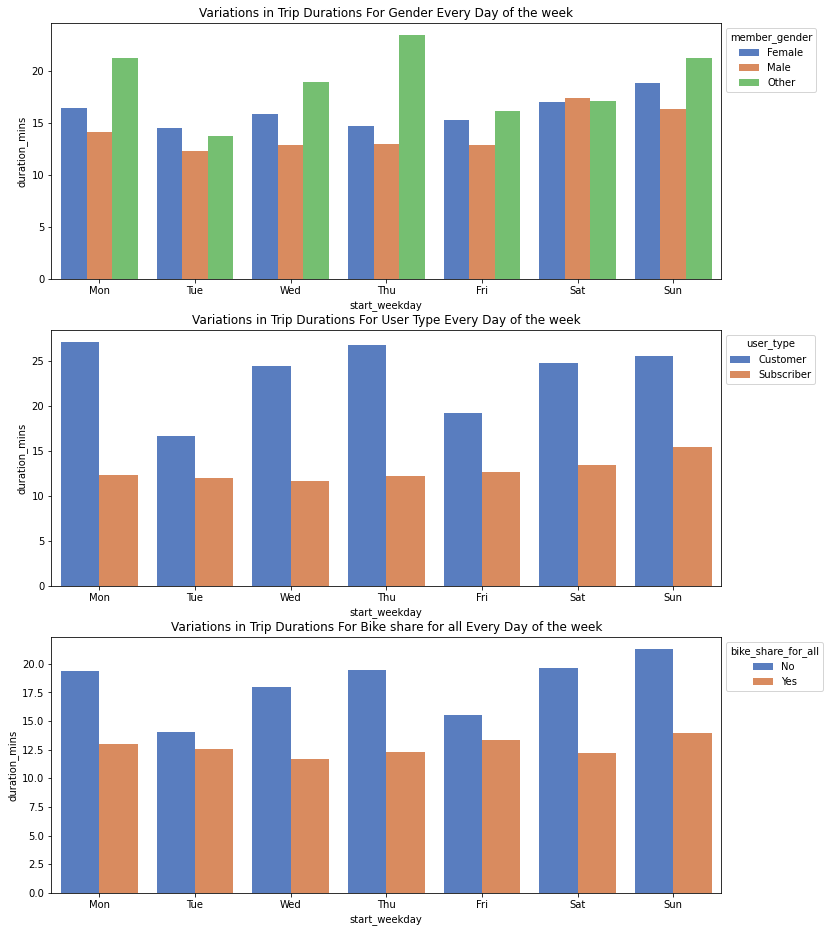

In [16]:
# Grouping the data
# grouping by categorical variables
df_grouped = df.groupby(['member_gender','user_type','bike_share_for_all_trip','start_weekday'], as_index =False)['duration_mins'].mean()
df_grouped
# setting the figure
# for gender
fig,ax = plt.subplots(nrows = 3, figsize =[12,16])
sns.barplot(data = df_grouped, x ='start_weekday', y = 'duration_mins',
               hue = 'member_gender', ci = None,palette = 'muted', ax = ax[0])
ax[0].legend(loc ='upper left', bbox_to_anchor = (1,1), title = 'member_gender')
ax[0].set_title('Variations in Trip Durations For Gender Every Day of the week')

# for user type
sns.barplot(data = df_grouped, x ='start_weekday', y = 'duration_mins',
               hue = 'user_type', ci = None, palette = 'muted', ax = ax[1])
ax[1].legend(loc ='upper left', bbox_to_anchor = (1,1), title = 'user_type')
ax[1].set_title('Variations in Trip Durations For User Type Every Day of the week')
# for bike_share_for all
sns.barplot(data = df_grouped, x ='start_weekday', y = 'duration_mins',
               hue = 'bike_share_for_all_trip', ci = None, palette = 'muted', ax = ax[2])
ax[2].legend(loc ='upper left', bbox_to_anchor = (1,1), title = 'bike_share_for_all')
ax[2].set_title('Variations in Trip Durations For Bike share for all Every Day of the week');

In [ ]:
!jupyter nbconvert Data_Exploration_part_2.ipynb --to slides --post serve --no-input --no-prompt